In [5]:
##core libraries##
#numpy - powerful Python library for numerical computing
#pip install numpy
#scikit-learn - open-source machine learning library built om top of numPy, SciPy and metplatlib used to build ML models and data preprocessing
#pip install scikit-learn
#FlagEmbedding - embedding models map input data (like words, sentences, or images) into dense vectors in a continuous vector space. These embeddings are then used in downstream tasks like:
    #Text classification
    #Similarity search
    #Recommendation systems
#pip install FlagEmbedding

##below optional module is used only for code quality##
#typing - python module that provides support for type hints, which help in specifying the types of variables, function parameters, and return values. The goal of typing is to make Python code more readable, maintainable, and less error-prone by offering a way to indicate what types are expecte
#pip install typing

##below optional libraries are used only for visualization##
#matplotlib - python library for creating static, interactive, and animated visualizations
#pip install matplotlib
#mplcursors - python library used for creating interactive cursors in Matplotlib plots. It enhances interactivity by allowing users to hover over or click on plot elements to display annotations, such as data values
#pip install mplcursors
#ipympl - enable interactive plots using the ipympl backend, which allows zooming, panning, and resizing directly within the notebook interface.
#pip install ipympl

In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install FlagEmbedding

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install typing

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install mplcursors

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from FlagEmbedding import FlagModel

import matplotlib.pyplot as plt
import mplcursors
from typing import List

%matplotlib ipympl

In [13]:
#sample sentences to do cosine similarity testing
animal_sen_1 = "Elephants are known for their exceptional memory and intelligence, often living in complex social structures."
animal_sen_2 = "The blue whale is the largest animal on the planet, with a heart the size of a small car."
animal_sen_3 = "Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop."

sport_sen_1 = "Soccer, known as football outside of North America, is the world's most popular sport, with a fan base that spans across continents."
sport_sen_2 = "The modern Olympic Games, revived in 1896, are a global event that brings together athletes from over 200 nations."
sport_sen_3 = "Serena Williams has dominated women's tennis with 23 Grand Slam singles titles, making her one of the greatest athletes of all time."

modern_society_sen_1 = "The advent of the internet has transformed modern society, enabling global connectivity and access to information at an unprecedented scale."
modern_society_sen_2 = "Climate change has become one of the most pressing issues of modern society, with a growing consensus on the need for sustainable practices."
modern_society_sen_3 = "Social media has reshaped the way we communicate and consume information, influencing everything from politics to personal relationships."

programming_sen_1 = "C++ programmers harness the power of low-level memory manipulation, crafting efficient and high-performance software for a variety of applications."
programming_sen_2 = "Java developers thrive in building platform-independent solutions, leveraging the language's 'write once, run anywhere' philosophy for versatile and scalable applications."
programming_sen_3 = "Python programmers embrace the language's readability and expressiveness, creating elegant and concise code that facilitates rapid development across diverse domains."

# combine all the examples in one list
all_input_text = [
    animal_sen_1, animal_sen_2, animal_sen_3,
    sport_sen_1, sport_sen_2, sport_sen_3,
    modern_society_sen_1, modern_society_sen_2, modern_society_sen_3,
    programming_sen_1, programming_sen_2, programming_sen_3
    ]

In [14]:
# Load embedding model
embedding_model = FlagModel('BAAI/bge-large-zh-v1.5',
                  #query_instruction_for_retrieval="largest animal on the planet",
                  # use_fp16=True
                  )
# Setting use_fp16 to True speeds up computation with a slight performance degradation

In [15]:
#apply embedding on sample data
embeddings = []
for input_text in all_input_text:
    emb = embedding_model.encode(input_text)
    embeddings.append(emb)

embeddings_array = np.array(embeddings)
print("Shape: " + str(embeddings_array.shape), "\n")
print("Sample array:", embeddings_array[0])

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Shape: (12, 1024) 

Sample array: [-0.02005 -0.0313   0.00738 ... -0.02623  0.03998  0.00504]


RAG

1. Vectorize the user's query using embedding model

In [17]:
query = "What are some remarkable characteristics of elephants?"
q_v = embedding_model.encode(query)

2. Do the vector search in sample data

In [18]:
def search(embeddings:List, q_v:List)->List[float]:
    """
    Search for the cosine similarity scores between a query vector (q_v) and a list of embedding vectors.

    Parameters:
        embeddings (List[List[float]]): A list of embedding vectors.
        q_v (List[float]): The query vector for which the cosine similarity scores are calculated.

    Returns:
        List[float]: A list of cosine similarity scores between the query vector and each embedding vector.
    """
    scores = []
    for vec in embeddings:
        scores.append(cosine_similarity([vec], [q_v])[0][0])
    return scores

score_list = search(embeddings, q_v)
print(score_list)

[np.float64(0.6414630997096242), np.float64(0.4577403698698506), np.float64(0.37707898960780606), np.float64(0.3103991841815059), np.float64(0.2827233887956655), np.float64(0.29406756973313786), np.float64(0.35231050747367665), np.float64(0.32766909041039344), np.float64(0.3042057786551836), np.float64(0.3416245191334798), np.float64(0.2966530370773228), np.float64(0.408391831527278)]


3. Retrieve top n matched results

In [19]:
n = 3
sorted_indices = np.argsort(score_list)[::-1]
top_n_indices = sorted_indices[:n]
top_n_indices

retrieved_content = []
for i in top_n_indices:
    print(all_input_text[i], "\n")
    retrieved_content.append(all_input_text[i])

Elephants are known for their exceptional memory and intelligence, often living in complex social structures. 

The blue whale is the largest animal on the planet, with a heart the size of a small car. 

Python programmers embrace the language's readability and expressiveness, creating elegant and concise code that facilitates rapid development across diverse domains. 



Utility function: compute_cosine_similarity - retrieve cosine similarity score

In [20]:
def compute_cosine_similarity(embeddings: np.ndarray, idx1: int, idx2: int) -> float:
    """
    Computes the cosine similarity between two embeddings.

    Parameters:
    embeddings (np.ndarray): An array of embeddings.
    idx1 (int): The index of the first embedding.
    idx2 (int): The index of the second embedding.

    Returns:
    float: The cosine similarity between the two embeddings.
    """
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])[0][0]

Get the cosine similarity score

In [21]:
print(all_input_text[0])
print(all_input_text[9])
print(all_input_text[10])
print(all_input_text[3])
print(all_input_text[4])
print(all_input_text[11])
print("animal_sen_1 vs animal_sen_2:", compute_cosine_similarity(embeddings,0,1))
print("animal_sen_1 vs programming_sen_1:", compute_cosine_similarity(embeddings,0,9))
print("sport_sen_1 vs sport_sen_2:", compute_cosine_similarity(embeddings,3,4))
print("sport_sen_1 vs programming_sen_11:", compute_cosine_similarity(embeddings,3,11))

Elephants are known for their exceptional memory and intelligence, often living in complex social structures.
C++ programmers harness the power of low-level memory manipulation, crafting efficient and high-performance software for a variety of applications.
Java developers thrive in building platform-independent solutions, leveraging the language's 'write once, run anywhere' philosophy for versatile and scalable applications.
Soccer, known as football outside of North America, is the world's most popular sport, with a fan base that spans across continents.
The modern Olympic Games, revived in 1896, are a global event that brings together athletes from over 200 nations.
Python programmers embrace the language's readability and expressiveness, creating elegant and concise code that facilitates rapid development across diverse domains.
animal_sen_1 vs animal_sen_2: 0.4778315219429625
animal_sen_1 vs programming_sen_1: 0.48398258301854813
sport_sen_1 vs sport_sen_2: 0.6138359640572302
spor

Utility function: plot_2D - 2D visualization function

In [22]:
def plot_2D(x_values: List[float],
            y_values: List[float],
            labels: List[str]) -> None:
    """
    Plots a 2D scatter plot with interactive annotations.

    Parameters:
    x_values (List[float]): A list of x-coordinates for each point.
    y_values (List[float]): A list of y-coordinates for each point.
    labels (List[str]): A list of labels for each point.
    """
    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha = 0.5,
                         edgecolors='k',
                         s = 40)

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12)

    plt.show()

Perform PCA for reducing the dimension from 1024 to 3

In [23]:
from sklearn.decomposition import PCA
# Perform PCA for reducing the dimension from 1024 to 3
PCA_model = PCA(n_components=3)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (12, 3)
[[ 1.32944606e-01  8.93976046e-05  3.93723098e-01]
 [-2.40283362e-01 -2.72162191e-01  3.82897194e-01]
 [-2.65837151e-01 -4.96359756e-01  1.92144393e-01]
 [-2.73670445e-01 -1.26523858e-04 -3.07239727e-01]
 [-3.32191415e-01  1.52164237e-01 -3.21669774e-01]
 [-3.40911366e-01 -3.42839428e-01 -3.02650188e-01]
 [-8.75262256e-02  4.31609737e-01  7.57473337e-03]
 [-7.53733513e-02  3.27470880e-01  2.51143275e-01]
 [-9.52671417e-02  4.90959910e-01  5.41420381e-02]
 [ 5.04677581e-01 -1.25153037e-01 -1.22900706e-01]
 [ 6.00280091e-01 -1.01866130e-01 -7.17054033e-02]
 [ 4.73158179e-01 -6.37870973e-02 -1.55458932e-01]]


2D plot

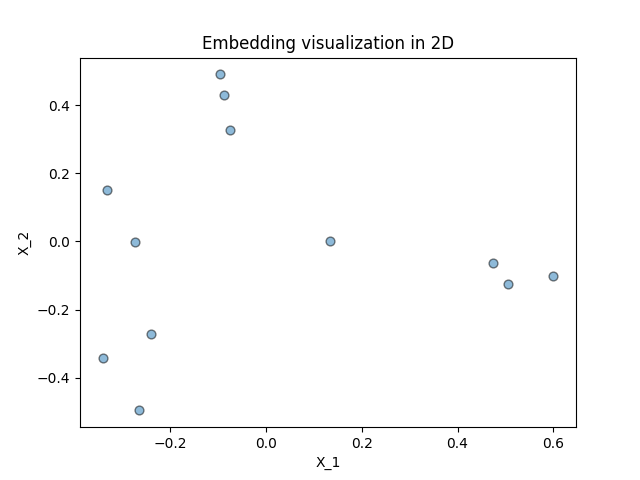

In [24]:
plot_2D(new_values[:,0], new_values[:,1], all_input_text)

3D plot

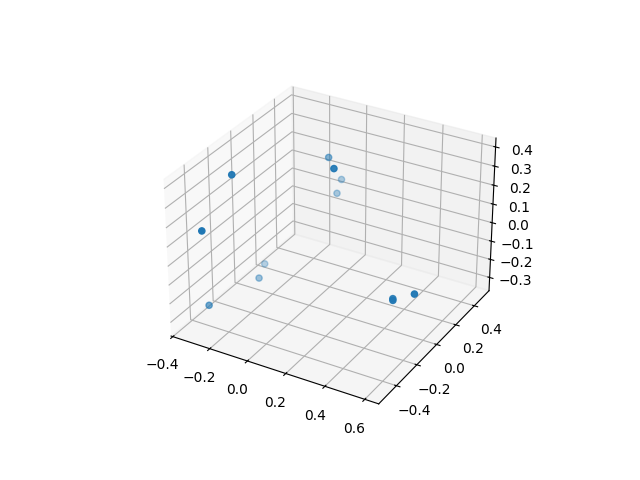

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(new_values[:, 0], new_values[:, 1], new_values[:, 2])